<a href="https://colab.research.google.com/github/nujcharee/python/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, f1_score, fbeta_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split
from sklearn.metrics import plot_confusion_matrix

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/nujcharee/python/main/dummy.csv", index_col=0)


school = df.sample(n=500, random_state=1)
other = df[df['School']==0]

df = pd.concat([school,other], axis=0)

In [6]:
df = df.reset_index()
df.head(5)

,Date,Age,Gender,ORF1ab,N_Gene,S_Gene,Symptomatic,Travel,School
0,28/06/2021,37,Male,12.71324,12.63245,12.78165,Y,U,0
1,22/06/2021,35,Female,15.94378,17.02672,16.29947,Y,U,1
2,11/07/2021,26,Female,15.38892,13.49842,15.37547,Y,U,1
3,16/08/2021,36,Female,26.18670,25.79520,25.99300,N,U,1
4,17/10/2021,47,Female,18.47000,22.29000,23.21000,N,U,1


In [7]:
df = df.sort_values('Date')

In [9]:
# feature engineering
#df['AvgCt'] = df[['ORF1ab', 'N_Gene', 'S_Gene']].mean(axis=1)

import datetime
df2 = df.copy()
df2['Date'] = pd.to_datetime(df['Date'])
df2['Month'] = df2['Date'].dt.month


In [10]:
# encoding

df2['Male'] = np.where(df2['Gender']=="Male",1,0)
df2['Symp'] = np.where(df2['Symptomatic']=="Y",1,0)
df2['HasTravel'] = np.where(df2['Travel']=="Y",1,0)
df2['Season'] = np.where(df2['Month'].isin([3,4,5]),2, # spring
                       np.where(df2['Month'].isin([6,7,8]), 3, #"Summer",
                       np.where(df2['Month'].isin([9,10,11]),4, #"Autumn",
                       np.where(df2['Month'].isin([12,1,2]), 1,0))))


In [39]:
# machine learning
unwanted = ['Date','School', 'Gender', 'Symptomatic', 'Travel', 'Season', 'HasTravel', 'Month']

X = df2.drop(unwanted,axis=1)
y = df2['School'].astype('category')


**Train and Test split**

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 356
Before OverSampling, counts of label '0': 1769 

After OverSampling, the shape of train_X: (3538, 6)
After OverSampling, the shape of train_y: (3538,) 

After OverSampling, counts of label '1': 1769
After OverSampling, counts of label '0': 1769


In [38]:

#X_train= RobustScaler().fit_transform(X_train)
X_train= StandardScaler().fit_transform(X_train)
#X_train_res= RobustScaler().fit_transform(X_train_res)
#X_train_res= StandardScaler().fit_transform(X_train_res)

#StandardScaler().fit_transform(X_train_res)
#X_train= MinMaxScaler().fit_transform(X_train)

**Deep Learning Approach**

In [15]:
import numpy as np
#import os.path
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from keras.layers import BatchNormalization

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, History, LearningRateScheduler
#from tensorflow.keras import regularizers
# from keras.layers import Recurrent_Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers 

#import time
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import roc_curve,auc

In [16]:
def normalise(data,maxi='none',mini='none'):
    feature_length=data.shape[1]
    normalised_data=np.zeros([len(data),1])
    for i in range (0,feature_length+1):
        maximum=np.amax(data[:,i-1:i], axis=0)
        minimum=np.amin(data[:,i-1:i],axis=0)
        feature=data[:,i-1:i]
        normalised_feature=(feature-minimum)/(maximum-minimum)
        normalised_data=np.concatenate((normalised_data,normalised_feature), axis=1)
    return normalised_data[:,1:]

def custom_auc(ground_truth, predictions):
    # I need only one column of predictions["0" and "1"]. You can get an error here
    # while trying to return both columns at once
    fpr, tpr, _ = roc_curve(ground_truth, predictions)    
    return auc(fpr, tpr)

def seq_data_manipulator(data, seq_dim, input_dim, output_dim):
    X,Y=data
    X=np.array(X)
    Y=np.array(Y)

    lx=len(X)
    x = []# 
    y = []#

    for i in range(seq_dim,lx):
        x.append(X[i-seq_dim:i, 0:(input_dim)])# append adds elements to the end of the list. i-60:i takes the values from i-seq_dim to i
        y.append(Y[i, 0:output_dim])

    x, y= np.array(x), np.array(y)
    return (x, y)


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras

def binary_fbeta(ytrue , ypred, beta=1, threshold=0.5, epsilon=1e-7):
    # epsilon is set so as to avoid division by zero error
    
    beta_squared = beta**2 # squaring beta

    # casting ytrue and ypred as float dtype
    ytrue = tf.cast(ytrue, tf.float32)
    ypred = tf.cast(ypred, tf.float32)

    # setting values of ypred greater than the set threshold to 1 while those lesser to 0
    ypred = tf.cast(tf.greater_equal(ypred, tf.constant(threshold)), tf.float32)

    tp = tf.reduce_sum(ytrue*ypred) # calculating true positives
    predicted_positive = tf.reduce_sum(ypred) # calculating predicted positives
    actual_positive = tf.reduce_sum(ytrue) # calculating actual positives
    
    precision = tp/(predicted_positive+epsilon) # calculating precision
    recall = tp/(actual_positive+epsilon) # calculating recall
    
    # calculating fbeta
    fb = (1+beta_squared)*precision*recall / (beta_squared*precision + recall + epsilon)

    return fb
def recall(y_true, y_pred):

  """Recall metric.

  Only computes a batch-wise average of recall.

  Computes the recall, a metric for multi-label classification of
  how many relevant items are selected.
  """
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision(y_true, y_pred):
  """Precision metric.

  Only computes a batch-wise average of precision.

  Computes the precision, a metric for multi-label classification of
  how many selected items are relevant.
  """
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def custom_auc(ground_truth, predictions):
    # I need only one column of predictions["0" and "1"]. You can get an error here
    # while trying to return both columns at once
    fpr, tpr, _ = roc_curve(ground_truth, predictions)    
    return auc(fpr, tpr)

In [17]:
#Neural Network Hyperparameters

input_dim = 6
output_dim = 1
num_epochs = 50
learning_rate = 0.001
batch_size =64 #int(opt)32
dropout=0.3
hidden_dim_1=64# 32,64,128,512,1024
hidden_dim_2=128# 32,64,128,512,1024
output_activation = 'sigmoid'
initial_activation = 'relu'
kernel_initializer="he_uniform" #"glorot_uniform"
bias_initializer="he_uniform"
loss_function='BinaryCrossentropy'
#loss_function='mae'
optimiser=optimizers.Adamax(lr=learning_rate)
#optimiser = optimizers.Adam(clipvalue=0.5)
metric=tf.keras.metrics.AUC()#,
#metric = tf.keras.metrics.Accuracy
#metric=tf.keras.metrics.SensitivityAtSpecificity
#metric=tf.keras.metrics.BinaryCrossentropy
kernel_regularizer='l1_l2'# 'l2','l1_l2'
seq_dim=5
recurrent_initializer="glorot_uniform"
recurrent_activation="relu"


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [45]:
#XX = np.array(df2[['Age', 'ORF1ab','N_Gene','S_Gene'
#                    , 'Male', 'Symp']])
##yy = np.array(df2['School']).reshape(len(df2),1)
yy = np.array(y_train).reshape(len(y_train),1)
#X=normalise(X_train)
x,y=seq_data_manipulator((X_train, yy), seq_dim, input_dim, output_dim)
X_train1 = np.array(X_train)
X_test1=np.array(X_test)
y_train1=np.array(y_train)
y_test1=np.array(y_test)

A simple model

In [94]:
# machine learning
unwanted = ['Date','School', 'Gender', 'Symptomatic', 'Travel', 'Season', 'HasTravel', 'Month']

X = df2.drop(unwanted,axis=1)
y = df2['School'].astype('category')

X,y=SMOTE().fit_resample(X,y.values.ravel())
y=pd.DataFrame(y)
X=pd.DataFrame(X)

X= StandardScaler().fit_transform(X)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X, y, test_size = 0.3, random_state=0)

y = np.array(y).reshape(len(y),1)
x,y=seq_data_manipulator((X, y), seq_dim, input_dim, output_dim)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

X_train1 = np.array(X_train)
X_test1=np.array(X_test)
y_train1=np.array(y_train)
y_test1=np.array(y_test)

In [64]:
from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

metrics = [
    tf.metrics.AUC(name='auc'),
    tf.metrics.AUC(name='prc', curve='PR')
]
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

**Single LSTM**

K fold:  1
Size x: 488
Size y: 488
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 64)                17920     
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 4s 25ms/step - loss: 0.6391 - auc: 0.7524 - prc: 0.7483 - val_loss: 0.5643 - val_auc: 0.8339 - val_prc: 0.8252
Epoch 2/80
46/46 [==============================] - 0s 11ms/step - loss: 0.5408 - auc: 0.8398 - prc: 0.8469 - val_loss: 0.4978 - val_auc: 0.8619 - val_prc: 0.8616
Epoch 3/80
46/46 [==============================] - 0s 11ms/step - loss: 0.4969

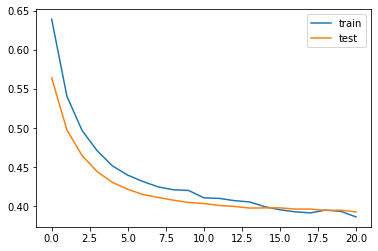

AUC : 0.9122585654258728
AUCPR : 0.9263859987258911
Confusion matrix, without normalization
[[228  26]
 [ 45 189]]


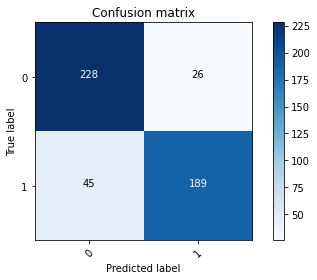

Accuracy: 85.45%
Precision: 87.91%
Recall: 80.77%
F1-score: 84.19%
K fold:  2
Size x: 976
Size y: 976
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 64)                17920     
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 4s 24ms/step - loss: 0.6549 - auc: 0.7200 - prc: 0.7191 - val_loss: 0.5936 - val_auc: 0.7825 - val_prc: 0.7534
Epoch 2/80
46/46 [==============================] - 0s 11ms/step - loss: 0.5455 - auc: 0.8229 - prc: 0.8178 - val_loss: 0.5103 - val_auc: 0.8513 - val_prc: 0.8490
Epoch 3/80
4

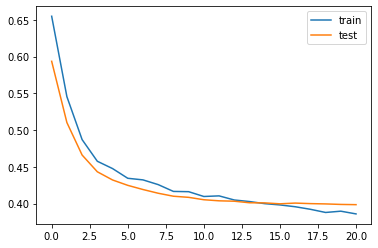

AUC : 0.9280829429626465
AUCPR : 0.945785403251648
Confusion matrix, without normalization
[[214  17]
 [ 49 208]]


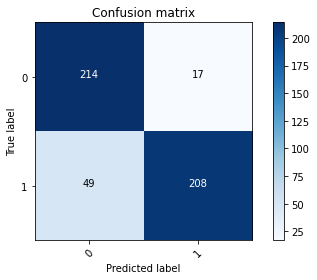

Accuracy: 86.48%
Precision: 92.44%
Recall: 80.93%
F1-score: 86.31%
K fold:  3
Size x: 1464
Size y: 1464
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 64)                17920     
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 4s 25ms/step - loss: 0.6113 - auc: 0.7854 - prc: 0.7749 - val_loss: 0.5400 - val_auc: 0.8403 - val_prc: 0.8161
Epoch 2/80
46/46 [==============================] - 0s 11ms/step - loss: 0.5297 - auc: 0.8360 - prc: 0.8287 - val_loss: 0.4875 - val_auc: 0.8663 - val_prc: 0.8568
Epoch 3/80

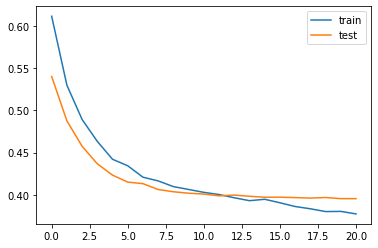

AUC : 0.9206470847129822
AUCPR : 0.9392353892326355
Confusion matrix, without normalization
[[210  19]
 [ 50 209]]


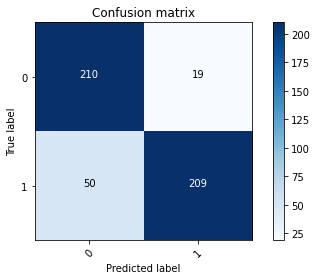

Accuracy: 85.86%
Precision: 91.67%
Recall: 80.69%
F1-score: 85.83%
K fold:  4
Size x: 1952
Size y: 1952
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 64)                17920     
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 4s 25ms/step - loss: 0.7533 - auc: 0.6256 - prc: 0.6447 - val_loss: 0.6298 - val_auc: 0.7235 - val_prc: 0.7042
Epoch 2/80
46/46 [==============================] - 1s 11ms/step - loss: 0.5675 - auc: 0.7946 - prc: 0.7973 - val_loss: 0.4985 - val_auc: 0.8601 - val_prc: 0.8648
Epoch 3/80

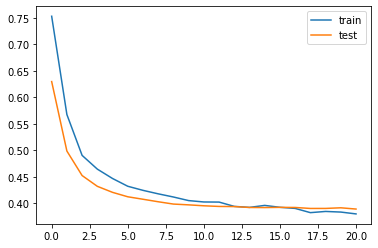

AUC : 0.889354407787323
AUCPR : 0.9187279939651489
Confusion matrix, without normalization
[[211  18]
 [ 68 191]]


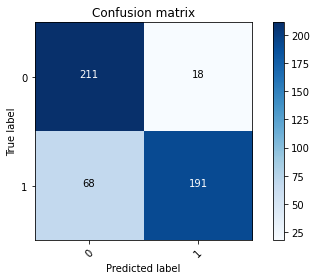

Accuracy: 82.38%
Precision: 91.39%
Recall: 73.75%
F1-score: 81.62%
K fold:  5
Size x: 2440
Size y: 2440
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 64)                17920     
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 4s 24ms/step - loss: 0.6752 - auc: 0.6721 - prc: 0.6996 - val_loss: 0.5931 - val_auc: 0.7789 - val_prc: 0.7531
Epoch 2/80
46/46 [==============================] - 1s 11ms/step - loss: 0.5645 - auc: 0.8067 - prc: 0.7965 - val_loss: 0.5020 - val_auc: 0.8570 - val_prc: 0.8512
Epoch 3/80

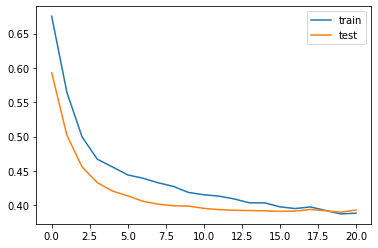

AUC : 0.9143697619438171
AUCPR : 0.9184583425521851
Confusion matrix, without normalization
[[214  36]
 [ 47 191]]


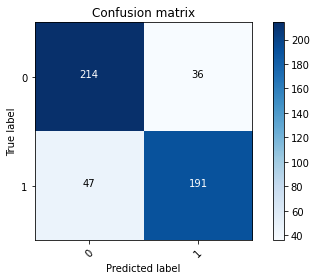

Accuracy: 82.99%
Precision: 84.14%
Recall: 80.25%
F1-score: 82.15%
--- 572.5320949554443 seconds ---


In [80]:
auc_perf = []
aucpr_perf = []

acc = []
prec = []
rec = []
f1_ = []

tscv = TimeSeriesSplit()
TimeSeriesSplit(gap=0, max_train_size=0.5, n_splits=10, test_size=.5)
k =1

for train_index, test_index in tscv.split(X_train1):


  X_train, X_test = X_train1[train_index], X_train1[test_index]
  y_train, y_test = y_train1[train_index], y_train1[test_index]

  print("K fold: ", k)
  print("Size x:", len(X_train))
  print("Size y:", len(y_train))

  history = History()
  model = Sequential()

  model.add(LSTM(hidden_dim_1, input_shape=(seq_dim,input_dim)
  , activation=initial_activation, use_bias=False
  , bias_initializer=bias_initializer,recurrent_initializer=recurrent_initializer,  recurrent_dropout=dropout,kernel_initializer=kernel_initializer
  , return_sequences = False))

  #model.add(Dropout(dropout))
  model.add(Dense(units=output_dim, activation="sigmoid"))
  model.compile(loss=loss_function,
                optimizer=optimiser, metrics=[metrics])
                #='rmsprop')
  print(model.summary())

  callback = tf.keras.callbacks.EarlyStopping(monitor='prc', patience=20)

  model.fit(X_train1, y_train1
            , validation_data=(X_test1, y_test1)
            , batch_size=batch_size, epochs=80, callbacks=[callback, history])

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

  print('AUC :',model.evaluate(X_test, y_test, verbose=0)[1])
  print('AUCPR :',model.evaluate(X_test, y_test, verbose=0)[2])

  auc_perf.append(model.evaluate(X_test, y_test, verbose=0)[1])
  aucpr_perf.append(model.evaluate(X_test, y_test, verbose=0)[2])

  y_pred=model.predict(X_test, verbose=0)
  y_expected=pd.DataFrame(y_test)

  cnf_matrix=confusion_matrix(y_expected,y_pred.round())
  plot_confusion_matrix(cnf_matrix,classes=[0,1])
  plt.show()

  prediction = model.predict(X_test)
  y_pred = model.predict(X_test).ravel()


  accuracy = accuracy_score(y_test, prediction.round())
  precision = precision_score(y_test, prediction.round())
  recall = recall_score(y_test, prediction.round())
  f1score = f1_score(y_test, prediction.round())

  acc.append(accuracy)
  prec.append(precision)
  rec.append(recall)
  f1_.append(f1score)

  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print("Precision: %.2f%%" % (precision * 100.0))
  print("Recall: %.2f%%" % (recall * 100.0))
  print("F1-score: %.2f%%" % (f1score * 100.0))
  k +=1


print("--- %s seconds ---" % (time.time() - start_time))

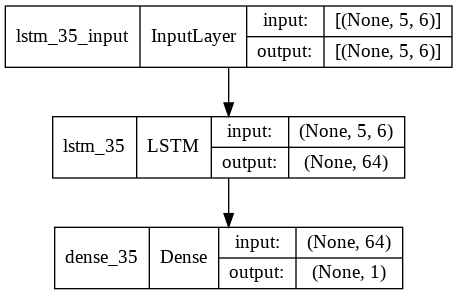

In [85]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)



In [86]:
np.mean(auc_perf), np.mean(aucpr_perf), np.std(aucpr_perf), np.mean(f1_), np.mean(prec), np.mean(rec)

(0.9129425525665283,
 0.9297186255455017,
 0.011021837361156061,
 0.8402004555643712,
 0.8950932336538102,
 0.7927906763795983)

**Stacked LSTM**

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 5, 64)             17920     
                                                                 
 lstm_37 (LSTM)              (None, 128)               98304     
                                                                 
 dense_41 (Dense)            (None, 1)                 129       
                                                                 
Total params: 116,353
Trainable params: 116,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 8s 46ms/step - loss: 0.5770 - auc: 0.8297 - prc: 0.8332 - val_loss: 0.4737 - val_auc: 0.8684 - val_prc: 0.8726
Epoch 2/80
46/46 [==============================] - 1s 28ms/step - loss: 0.4670 - auc: 0.8664 - prc: 0.8816 - val_loss: 0.4360 - val_auc: 0.879

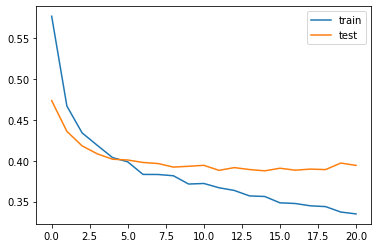

AUC : 0.9443434476852417
AUCPR : 0.9533140063285828
Confusion matrix, without normalization
[[233  21]
 [ 39 195]]


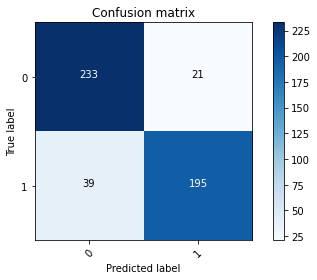

Accuracy: 87.70%
Precision: 90.28%
Recall: 83.33%
F1-score: 86.67%
K fold:  2
Size x: 976
Size y: 976
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 5, 64)             17920     
                                                                 
 lstm_39 (LSTM)              (None, 128)               98304     
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 116,353
Trainable params: 116,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 7s 56ms/step - loss: 0.5863 - auc: 0.8325 - prc: 0.8429 - val_loss: 0.4571 - val_auc: 0.8712 - val_prc: 0.8776
Epoch 2/80
46/46 [=======================

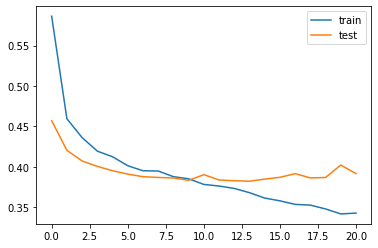

AUC : 0.9427711963653564
AUCPR : 0.9544932246208191
Confusion matrix, without normalization
[[213  18]
 [ 41 216]]


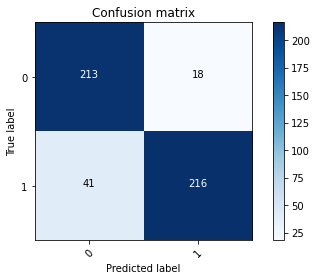

Accuracy: 87.91%
Precision: 92.31%
Recall: 84.05%
F1-score: 87.98%
K fold:  3
Size x: 1464
Size y: 1464
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 5, 64)             17920     
                                                                 
 lstm_41 (LSTM)              (None, 128)               98304     
                                                                 
 dense_43 (Dense)            (None, 1)                 129       
                                                                 
Total params: 116,353
Trainable params: 116,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 7s 47ms/step - loss: 0.5790 - auc: 0.8335 - prc: 0.8485 - val_loss: 0.4647 - val_auc: 0.8712 - val_prc: 0.8796
Epoch 2/80
46/46 [=====================

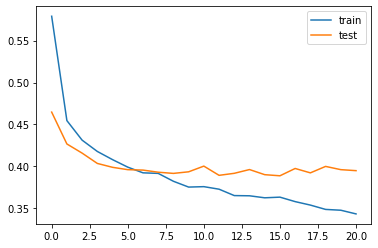

AUC : 0.9323228597640991
AUCPR : 0.9512355327606201
Confusion matrix, without normalization
[[216  13]
 [ 46 213]]


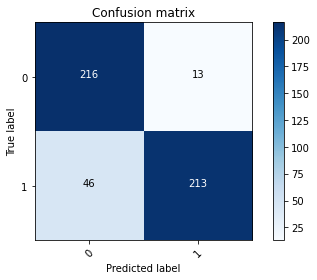

Accuracy: 87.91%
Precision: 94.25%
Recall: 82.24%
F1-score: 87.84%
K fold:  4
Size x: 1952
Size y: 1952
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 5, 64)             17920     
                                                                 
 lstm_43 (LSTM)              (None, 128)               98304     
                                                                 
 dense_44 (Dense)            (None, 1)                 129       
                                                                 
Total params: 116,353
Trainable params: 116,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 7s 46ms/step - loss: 0.5789 - auc: 0.8215 - prc: 0.8360 - val_loss: 0.4625 - val_auc: 0.8731 - val_prc: 0.8768
Epoch 2/80
46/46 [=====================

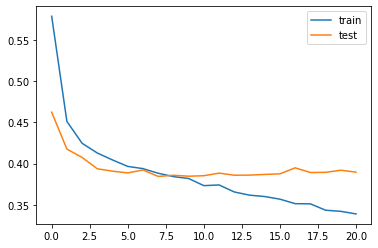

AUC : 0.9049248695373535
AUCPR : 0.9350146651268005
Confusion matrix, without normalization
[[217  12]
 [ 69 190]]


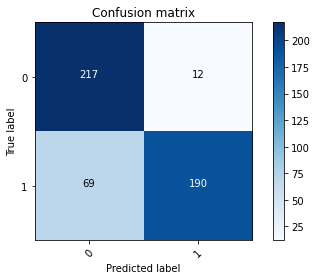

Accuracy: 83.40%
Precision: 94.06%
Recall: 73.36%
F1-score: 82.43%
K fold:  5
Size x: 2440
Size y: 2440
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 5, 64)             17920     
                                                                 
 lstm_45 (LSTM)              (None, 128)               98304     
                                                                 
 dense_45 (Dense)            (None, 1)                 129       
                                                                 
Total params: 116,353
Trainable params: 116,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 7s 48ms/step - loss: 0.5987 - auc: 0.7983 - prc: 0.8189 - val_loss: 0.4768 - val_auc: 0.8699 - val_prc: 0.8774
Epoch 2/80
46/46 [=====================

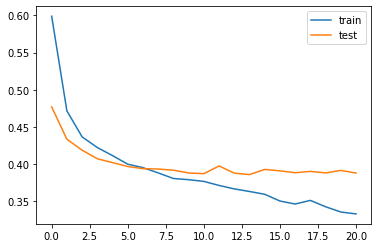

AUC : 0.9501091837882996
AUCPR : 0.9528206586837769
Confusion matrix, without normalization
[[231  19]
 [ 45 193]]


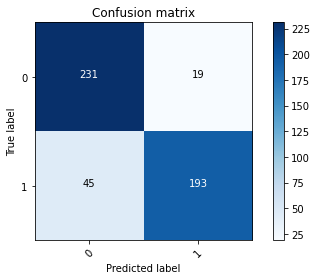

Accuracy: 86.89%
Precision: 91.04%
Recall: 81.09%
F1-score: 85.78%
--- 1449.3566818237305 seconds ---


In [90]:
auc_perf = []
aucpr_perf = []

acc = []
prec = []
rec = []
f1_ = []

tscv = TimeSeriesSplit()
TimeSeriesSplit(gap=0, max_train_size=0.5, n_splits=10, test_size=.5)
k =1

for train_index, test_index in tscv.split(X_train1):


  X_train, X_test = X_train1[train_index], X_train1[test_index]
  y_train, y_test = y_train1[train_index], y_train1[test_index]

  print("K fold: ", k)
  print("Size x:", len(X_train))
  print("Size y:", len(y_train))

  history = History()
  model = Sequential()

  model.add(LSTM(hidden_dim_1, input_shape=(seq_dim,input_dim), activation=initial_activation, use_bias=False
                 , bias_initializer=bias_initializer,recurrent_initializer=recurrent_initializer
                 ,  recurrent_dropout=dropout,kernel_initializer=kernel_initializer
                 , return_sequences = True))#,kernel_regularizer=kernel_regularizer))
  #model.add(Dropout(dropout))
  #model.add(BatchNormalization())
  model.add(LSTM(hidden_dim_2, input_shape=(seq_dim,input_dim), activation=initial_activation, use_bias=False, bias_initializer=bias_initializer,recurrent_initializer=recurrent_initializer,  recurrent_dropout=dropout,kernel_initializer=kernel_initializer
                 , return_sequences = False))#,kernel_regularizer=kernel_regularizer))

  model.add(Dense(units=output_dim, activation=output_activation))
  model.compile(loss=loss_function,
                optimizer=optimiser, metrics=[metrics])
                #='rmsprop')
  print(model.summary())

  callback = tf.keras.callbacks.EarlyStopping(monitor='prc', patience=20)

  model.fit(X_train1, y_train1
            , validation_data=(X_test1, y_test1)
            , batch_size=batch_size, epochs=80, callbacks=[callback, history])

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

  print('AUC :',model.evaluate(X_test, y_test, verbose=0)[1])
  print('AUCPR :',model.evaluate(X_test, y_test, verbose=0)[2])

  auc_perf.append(model.evaluate(X_test, y_test, verbose=0)[1])
  aucpr_perf.append(model.evaluate(X_test, y_test, verbose=0)[2])

  y_pred=model.predict(X_test, verbose=0)
  y_expected=pd.DataFrame(y_test)

  cnf_matrix=confusion_matrix(y_expected,y_pred.round())
  plot_confusion_matrix(cnf_matrix,classes=[0,1])
  plt.show()

  prediction = model.predict(X_test)
  y_pred = model.predict(X_test).ravel()


  accuracy = accuracy_score(y_test, prediction.round())
  precision = precision_score(y_test, prediction.round())
  recall = recall_score(y_test, prediction.round())
  f1score = f1_score(y_test, prediction.round())

  acc.append(accuracy)
  prec.append(precision)
  rec.append(recall)
  f1_.append(f1score)

  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print("Precision: %.2f%%" % (precision * 100.0))
  print("Recall: %.2f%%" % (recall * 100.0))
  print("F1-score: %.2f%%" % (f1score * 100.0))
  k +=1


print("--- %s seconds ---" % (time.time() - start_time))

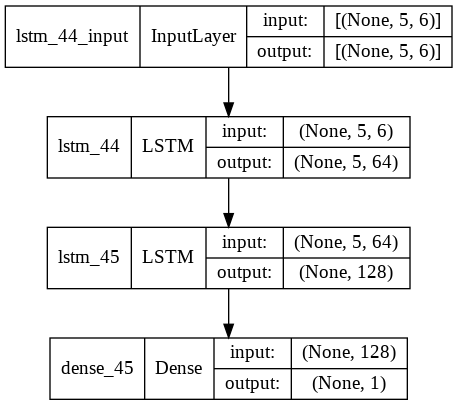

In [91]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)



In [92]:
np.mean(auc_perf), np.mean(aucpr_perf), np.std(aucpr_perf), np.mean(f1_), np.mean(prec), np.mean(rec)

(0.9348943114280701,
 0.9493756175041199,
 0.007256243598558049,
 0.861385407592825,
 0.9238607989714804,
 0.8081418370271655)

**Simple RNN**

K fold:  1
Size x: 488
Size y: 488
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4480      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 3s 18ms/step - loss: 1.1904 - auc: 0.5332 - prc: 0.5424 - val_loss: 0.7091 - val_auc: 0.6285 - val_prc: 0.5863
Epoch 2/80
46/46 [==============================] - 0s 5ms/step - loss: 0.8621 - auc: 0.6043 - prc: 0.5915 - val

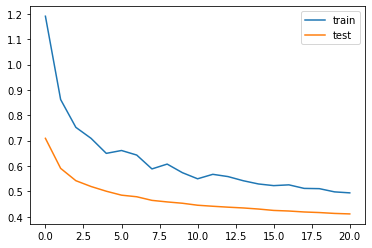

AUC : 0.8924473524093628
AUCPR : 0.9020624160766602
Confusion matrix, without normalization
[[209  45]
 [ 40 194]]


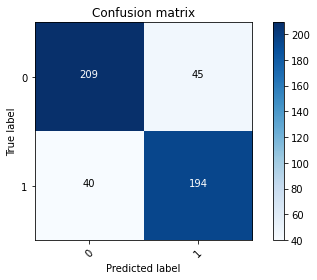

Accuracy: 82.58%
Precision: 81.17%
Recall: 82.91%
F1-score: 82.03%
K fold:  2
Size x: 976
Size y: 976
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4480      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 2s 17ms/step - loss: 1.0060 - auc: 0.6123 - prc: 0.6140 - val_loss: 0.6467 - val_auc: 0.7136 - val_prc: 0.6630
Epoch 2/80
46/46 [===========================

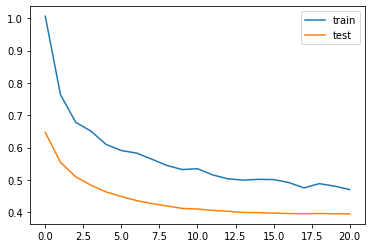

AUC : 0.8967018723487854
AUCPR : 0.9246304035186768
Confusion matrix, without normalization
[[202  29]
 [ 50 207]]


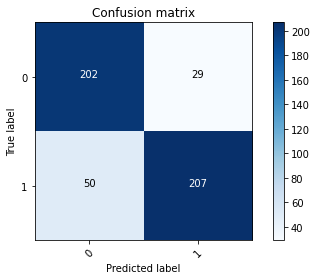

Accuracy: 83.81%
Precision: 87.71%
Recall: 80.54%
F1-score: 83.98%
K fold:  3
Size x: 1464
Size y: 1464
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 64)                4480      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 2s 18ms/step - loss: 1.1240 - auc: 0.5752 - prc: 0.5887 - val_loss: 0.7539 - val_auc: 0.6141 - val_prc: 0.5501
Epoch 2/80
46/46 [=========================

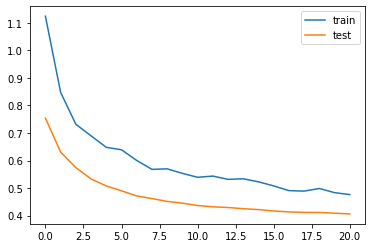

AUC : 0.8931480050086975
AUCPR : 0.9147968292236328
Confusion matrix, without normalization
[[194  35]
 [ 42 217]]


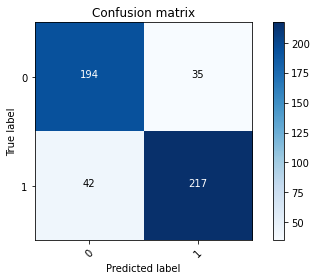

Accuracy: 84.22%
Precision: 86.11%
Recall: 83.78%
F1-score: 84.93%
K fold:  4
Size x: 1952
Size y: 1952
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                4480      
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 3s 17ms/step - loss: 0.8982 - auc: 0.6546 - prc: 0.6424 - val_loss: 0.6193 - val_auc: 0.7348 - val_prc: 0.7081
Epoch 2/80
46/46 [=========================

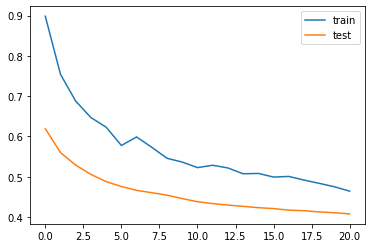

AUC : 0.8675625324249268
AUCPR : 0.8981539607048035
Confusion matrix, without normalization
[[209  20]
 [ 67 192]]


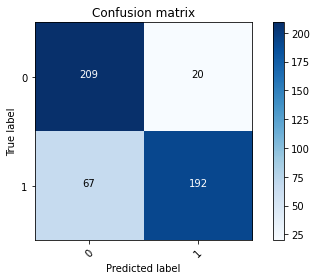

Accuracy: 82.17%
Precision: 90.57%
Recall: 74.13%
F1-score: 81.53%
K fold:  5
Size x: 2440
Size y: 2440
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                4480      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
46/46 [==============================] - 2s 19ms/step - loss: 0.9926 - auc: 0.6136 - prc: 0.5832 - val_loss: 0.6346 - val_auc: 0.7069 - val_prc: 0.6426
Epoch 2/80
46/46 [=========================

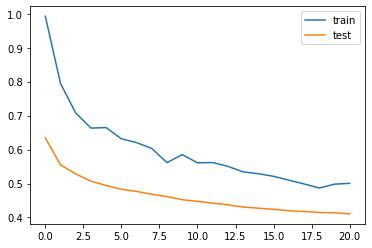

AUC : 0.8954957723617554
AUCPR : 0.902955949306488
Confusion matrix, without normalization
[[207  43]
 [ 41 197]]


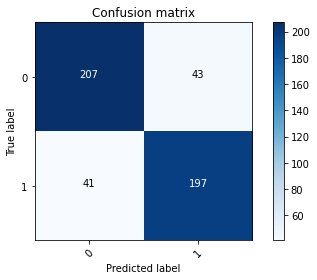

Accuracy: 82.79%
Precision: 82.08%
Recall: 82.77%
F1-score: 82.43%
--- 1019.0783851146698 seconds ---


In [87]:
auc_perf = []
aucpr_perf = []

acc = []
prec = []
rec = []
f1_ = []

tscv = TimeSeriesSplit()
TimeSeriesSplit(gap=0, max_train_size=0.5, n_splits=10, test_size=.5)
k =1

for train_index, test_index in tscv.split(X_train1):


  X_train, X_test = X_train1[train_index], X_train1[test_index]
  y_train, y_test = y_train1[train_index], y_train1[test_index]

  print("K fold: ", k)
  print("Size x:", len(X_train))
  print("Size y:", len(y_train))

  history = History()
  model = Sequential()

  model.add(SimpleRNN(hidden_dim_1
                      , input_shape=(seq_dim,input_dim)
                      , activation=initial_activation
                      , use_bias=False
                      , bias_initializer=bias_initializer
                      , recurrent_initializer=recurrent_initializer
                      , recurrent_dropout=dropout
                      ,kernel_initializer=kernel_initializer
                      , return_sequences = False))
  model.add(Dropout(dropout))
  model.add(Dense(units=output_dim, activation=output_activation))

  model.compile(loss=loss_function,
                optimizer=optimiser, metrics=[metrics])
                #='rmsprop')
  print(model.summary())

  callback = tf.keras.callbacks.EarlyStopping(monitor='prc', patience=20)

  model.fit(X_train1, y_train1
            , validation_data=(X_test1, y_test1)
            , batch_size=batch_size, epochs=80, callbacks=[callback, history])

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

  print('AUC :',model.evaluate(X_test, y_test, verbose=0)[1])
  print('AUCPR :',model.evaluate(X_test, y_test, verbose=0)[2])

  auc_perf.append(model.evaluate(X_test, y_test, verbose=0)[1])
  aucpr_perf.append(model.evaluate(X_test, y_test, verbose=0)[2])

  y_pred=model.predict(X_test, verbose=0)
  y_expected=pd.DataFrame(y_test)

  cnf_matrix=confusion_matrix(y_expected,y_pred.round())
  plot_confusion_matrix(cnf_matrix,classes=[0,1])
  plt.show()

  prediction = model.predict(X_test)
  y_pred = model.predict(X_test).ravel()


  accuracy = accuracy_score(y_test, prediction.round())
  precision = precision_score(y_test, prediction.round())
  recall = recall_score(y_test, prediction.round())
  f1score = f1_score(y_test, prediction.round())

  acc.append(accuracy)
  prec.append(precision)
  rec.append(recall)
  f1_.append(f1score)

  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print("Precision: %.2f%%" % (precision * 100.0))
  print("Recall: %.2f%%" % (recall * 100.0))
  print("F1-score: %.2f%%" % (f1score * 100.0))
  k +=1


print("--- %s seconds ---" % (time.time() - start_time))

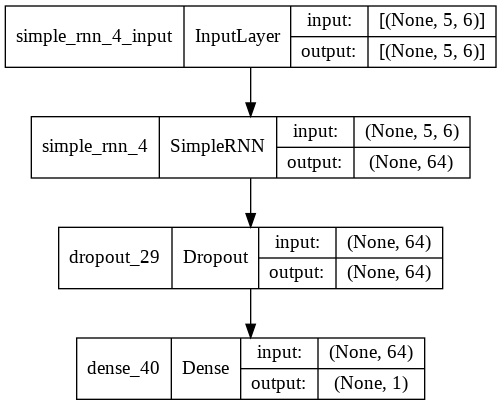

In [88]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)



In [89]:
np.mean(auc_perf), np.mean(aucpr_perf), np.std(aucpr_perf), np.mean(f1_), np.mean(prec), np.mean(rec)

(0.8890711069107056,
 0.9085199117660523,
 0.0097883349709215,
 0.8297844101005042,
 0.855287789408456,
 0.8082777942929006)

**Sklearn**

Score on test (wo hyperparameters) for Decision Tree: 74.94
Acurracy score on test set DecisionTreeClassifier is 0.75
Recall score on test set DecisionTreeClassifier is 0.75
Precision score on test set DecisionTreeClassifier is 0.76
F1 score on test set DecisionTreeClassifier is 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


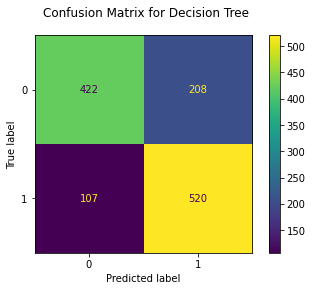

Best params:
{'criterion': 'entropy', 'max_depth': 81, 'max_features': 'sqrt'}
Best score in grid search:
0.7735938770209387
Best score in grid search on test: 0.7494033412887828
It took 3.369 sec to run.
Score on test (wo hyperparameters) for Random Forest: 75.42
Acurracy score on test set RandomForestClassifier is 0.75
Recall score on test set RandomForestClassifier is 0.75
Precision score on test set RandomForestClassifier is 0.76
F1 score on test set RandomForestClassifier is 0.76


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

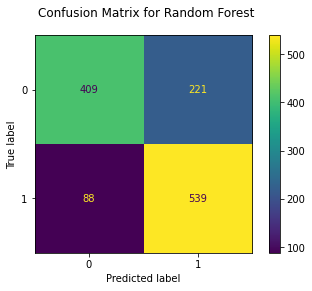

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best params:
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 70}
Best score in grid search:
0.8194373946430515
Best score in grid search on test: 0.7541766109785203
It took 62.797 sec to run.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iteratio

Score on test (wo hyperparameters) for Neural Net: 75.18
Acurracy score on test set MLPClassifier is 0.75
Recall score on test set MLPClassifier is 0.74
Precision score on test set MLPClassifier is 0.76
F1 score on test set MLPClassifier is 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


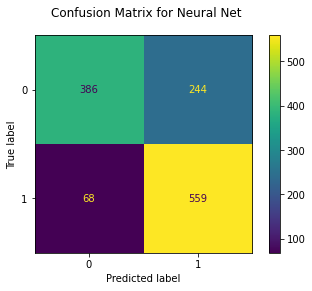

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converg

Best params:
{'alpha': 1, 'max_iter': 50}
Best score in grid search:
0.7775999833673378
Best score in grid search on test: 0.7517899761336515
It took 17.731 sec to run.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Score on test (wo hyperparameters) for AdaBoost: 75.58
Acurracy score on test set AdaBoostClassifier is 0.76
Recall score on test set AdaBoostClassifier is 0.76
Precision score on test set AdaBoostClassifier is 0.77
F1 score on test set AdaBoostClassifier is 0.76


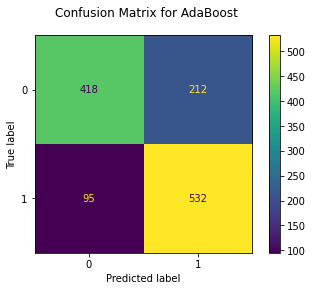

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best params:
{'learning_rate': 0.1}
Best score in grid search:
0.7741375658665891
Best score in grid search on test: 0.7557677008750995
It took 3.004 sec to run.
Score on test (wo hyperparameters) for Logistic Regression: 73.99
Acurracy score on test set LogisticRegression is 0.74
Recall score on test set LogisticRegression is 0.74
Precision score on test set LogisticRegression is 0.77
F1 score on test set LogisticRegression is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

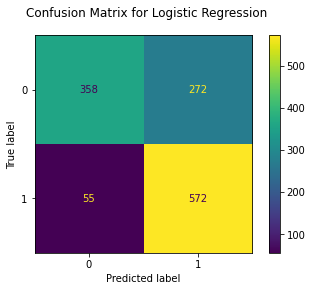

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best params:
{}
Best score in grid search:
0.772153477872928
Best score in grid search on test: 0.7398568019093079
It took 0.418 sec to run.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed whe

Score on test (wo hyperparameters) for ExtraTree: 83.77
Acurracy score on test set ExtraTreesClassifier is 0.84
Recall score on test set ExtraTreesClassifier is 0.78
Precision score on test set ExtraTreesClassifier is 0.78
F1 score on test set ExtraTreesClassifier is 0.78


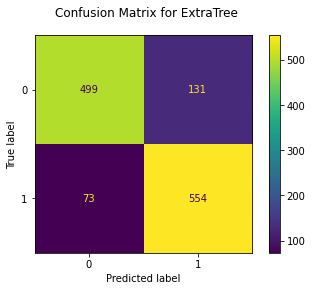

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best params:
{}
Best score in grid search:
0.8268730060305526
Best score in grid search on test: 0.837708830548926
It took 3.345 sec to run.


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Score on test (wo hyperparameters) for GradientBoostingClassifier: 76.37
Acurracy score on test set GradientBoostingClassifier is 0.76
Recall score on test set GradientBoostingClassifier is 0.76
Precision score on test set GradientBoostingClassifier is 0.77
F1 score on test set GradientBoostingClassifier is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


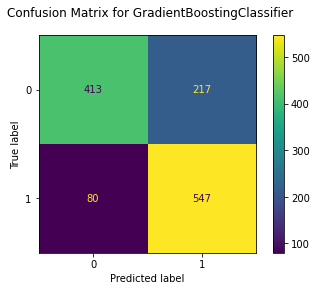

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Best params:
{}
Best score in grid search:
0.7793776559658472
Best score in grid search on test: 0.7637231503579952
It took 3.888 sec to run.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sk

Score on test (wo hyperparameters) for CalibratedClassifierCV: 73.99
Acurracy score on test set CalibratedClassifierCV is 0.74
Recall score on test set CalibratedClassifierCV is 0.74
Precision score on test set CalibratedClassifierCV is 0.77
F1 score on test set CalibratedClassifierCV is 0.75


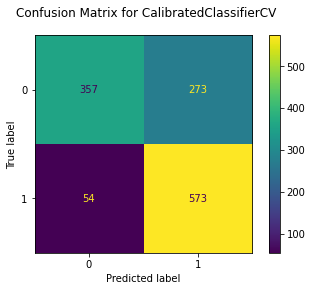

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Best params:
{}
Best score in grid search:
0.7719400397468685
Best score in grid search on test: 0.7398568019093079
It took 4.251 sec to run.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Score on test (wo hyperparameters) for HistGradientBoostingClassifier: 79.71
Acurracy score on test set HistGradientBoostingClassifier is 0.80
Recall score on test set HistGradientBoostingClassifier is 0.76
Precision score on test set HistGradientBoostingClassifier is 0.76
F1 score on test set HistGradientBoostingClassifier is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


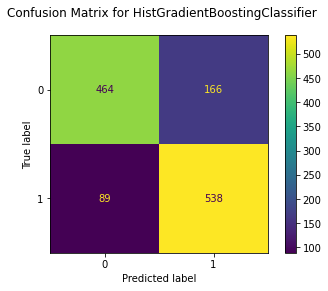

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best params:
{}
Best score in grid search:
0.7893890796993461
Best score in grid search on test: 0.7971360381861575
It took 4.945 sec to run.


In [96]:
import time
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=42)
result_acc = {}
result_auc = {}
result_recall = {}

models = []

names = [
          "Decision Tree"
         , "Random Forest"
         , "Neural Net"
         , "AdaBoost"
         , "Logistic Regression"
         , "ExtraTree"
         , "GradientBoostingClassifier"
         , "CalibratedClassifierCV"
         , "HistGradientBoostingClassifier"
        ]


classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=100),
    AdaBoostClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    CalibratedClassifierCV(),           
    HistGradientBoostingClassifier(),
    ]


param_grid = [
   
    {
      "max_depth": np.arange(1,100,10),              # DecisionTreeClassifier
      "criterion": ['gini', 'entropy'],
      "max_features": ['auto', 'sqrt', 'log2']
    },
    
    {
        "n_estimators": np.arange(10,100,10),        # RandomForestClassifier
        "max_depth": [None,1,2],
        "max_features": ['auto', 'sqrt', 'log2']
    },
    
    {
        "alpha": [0.5,1],                           # MLPClassifier
        "max_iter": [20,50]
    },
    { 
       "learning_rate": [0.1,1.0]                  # Adaboosting 

    },
    {
      # LogisticRegression - use default
    },
    {
      # ExtraTreesClassifier - use default
    },
    {
      # GradientBoostingClassifier - use default
    
    },
  {
      # CalibratedClassifierCV - use default           
    
  },
    {
      # HistGradientBoostingClassifier - use default
    }
    
]


index = 0 
# iterate over classifiers
df_result = pd.DataFrame()
for name, clf, param in zip(names, classifiers, param_grid):
    from sklearn.metrics import plot_confusion_matrix
    index +=1
    start = time.time()
    clf.fit(X_train_res, y_train_res)
    score = clf.score(X_test_res, y_test_res)*100 # conversion from fraction to probability
    y_pred = clf.predict(X_test_res)


    y_cv_pred = cross_val_predict(clf, X_test_res, y_test_res, cv=cv)

    cm = confusion_matrix(y_test_res, y_cv_pred)
    auc = accuracy_score(y_test_res, y_pred)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    f1 = 2 * (np.mean(recall) *np.mean(precision)) / (np.mean(recall) + np.mean(precision))
       
    print("============================================")
    print(f'Score on test (wo hyperparameters) for {name}: {score:.2f}')
    print(f'Acurracy score on test set {clf.__class__.__name__} is {accuracy_score(y_test_res, y_pred):.2f}')
    print(f'Recall score on test set {clf.__class__.__name__} is {np.mean(recall):.2f}')
    print(f'Precision score on test set {clf.__class__.__name__} is {np.mean(precision):.2f}')
    print(f'F1 score on test set {clf.__class__.__name__} is {f1:.2f}')

    # plot confusion matrix

    disp = plot_confusion_matrix(clf, X_test_res, y_test_res)
    
    disp.figure_.suptitle(f'Confusion Matrix for {name}')
    #print(f"Confusion matrix for {name}:\n{disp.confusion_matrix}")
    plt.show()
    
    # make pipeline and hyperparameters
    clf_pipe = make_pipeline(StandardScaler(), StandardScaler(),clf)
    
    
    grid_search = GridSearchCV(clf, param
                                 , cv=cv
                                 , scoring='f1')
    grid_search.fit(X_train_res, y_train_res)
    print(f"Best params:")
    print(grid_search.best_params_)
    print("Best score in grid search:")
    print(grid_search.best_score_)
    gscore = clf.score(X_test_res, y_test_res)
    print("Best score in grid search on test:", gscore)
    end = time.time()
    print('It took {} sec to run.'.format(round(end - start, 3)))

    df0 = pd.DataFrame({
        "model": [name]
        , "auc": [auc]
        , "recall": [np.mean(recall)]
        , "precision": [np.mean(precision)]
        , "f1": [f1]
        , "time": [round(end - start, 3)]
    })
    df_result = df_result.append(df0, True)
    models.append(grid_search.best_estimator_)
    result_acc[index] = grid_search.best_score_
    result_auc[index] = auc
    result_recall[index] = np.mean(recall)

    